In [1]:
from models import LSTM_tuning, LSTM_tuning_ud, XGB_tuning_ud, XGB_tuning, profit

In [2]:
import pandas as pd
import glob
import os
import numpy as np
import copy
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import keras
from keras.layers import Dropout
from numpy import argmax
from sklearn.metrics import accuracy_score
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.linalg import hankel
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates


No additional data


TypeError: profit() missing 1 required positional argument: 'X'

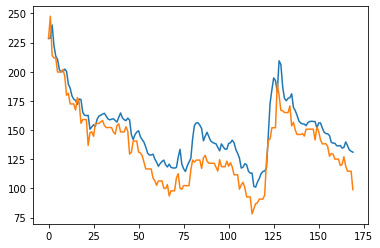

In [15]:

X = data['Adj Close']


_, y_test, _, y_pred =  LSTM_tuning(X,data[["comments_lm_pos", "comments_lm_neg"]])


plt.plot(y_test)
plt.plot(y_pred)


_, y_test, _, y_pred = XGB_tuning_ud(X,data[["comments_lm_pos", "comments_lm_neg"]])

_, y_test2, _, y_pred2 = XGB_tuning_ud(X)


accuracy_score(y_test2, y_pred2)

profit(y_test, y_pred)



In [3]:
data = pd.read_csv('D://Documents//ITMO//Year1//Course_project_github//Big_Data_course_project_2022//storage//GME_only_values.csv').drop('Unnamed: 0', axis = 1)
data['date'] = data['date'].astype('datetime64')
data.tail()

,date,likes,comments_num,posts_num,Adj Close,Volume,comments_lm_pos,comments_lm_neg,comments_lm_pol,comments_lm_subj,...,comments_hiv4_pol,comments_hiv4_subj,comments_vader_neg,comments_vader_compound,comments_vader_pos,comments_vader_neu,emojs,emojs_count,emoj_avg,emoj_sum
661,2022-05-05,2,1,2,119.129997,1753900.0,1486,4089,-0.466906,0.074386,...,0.152281,0.325243,0.154,1.0,0.170,0.677,0,0.0,0.0,0.0
662,2022-05-06,7,4,7,114.699997,1786800.0,5440,15322,-0.475966,0.084448,...,0.128460,0.332241,0.145,1.0,0.162,0.694,['📷'],1.0,0.0,0.0
663,2022-05-07,2,1,2,114.699997,1786800.0,5466,15224,-0.471629,0.084218,...,0.125707,0.331253,0.146,1.0,0.161,0.693,0,0.0,0.0,0.0
664,2022-05-08,3,0,3,114.699997,1786800.0,1561,4350,-0.471832,0.073791,...,0.153138,0.321266,0.151,1.0,0.170,0.679,['🌝'],1.0,1.0,1.0
665,2022-05-09,5,5,5,98.790001,3316200.0,5452,15262,-0.473593,0.084576,...,0.126397,0.333595,0.144,1.0,0.164,0.692,0,0.0,0.0,0.0


In [ ]:
data.columns.tolist()

['date',
 'likes',
 'comments_num',
 'posts_num',
 'Adj Close',
 'Volume',
 'comments_lm_pos',
 'comments_lm_neg',
 'comments_lm_pol',
 'comments_lm_subj',
 'comments_hiv4_pos',
 'comments_hiv4_neg',
 'comments_hiv4_pol',
 'comments_hiv4_subj',
 'comments_vader_neg',
 'comments_vader_compound',
 'comments_vader_pos',
 'comments_vader_neu',
 'emojs',
 'emojs_count',
 'emoj_avg',
 'emoj_sum']

In [ ]:
xgb_train_pred,xgb_test_pred ,train ,y_test = XGB_tuning(data['Adj Close'])
xgb_train_pred_ad,xgb_test_pred_ad ,train ,y_test = XGB_tuning(data['Adj Close'], additional_data= data[['comments_hiv4_pol', 'comments_vader_pos']] )

lstm_train_pred,lstm_test_pred ,train ,y_test = LSTM_tuning(data['Adj Close'], lag = 10)
lstm_train_pred_ad,lstm_test_pred_ad ,train ,y_test = LSTM_tuning(data['Adj Close'], additional_data= data[['comments_hiv4_pos']], lag = 10)


print('XGB no sent RMSE = ',mean_squared_error(xgb_test_pred, y_test))
print('XGB with sent RMSE = ',mean_squared_error(xgb_test_pred_ad, y_test))

print('LSTM no sent RMSE = ',mean_squared_error(lstm_test_pred, y_test))
print('LSTM with sent RMSE = ',mean_squared_error(lstm_test_pred_ad, y_test))




No additional data
No additional data
XGB no sent RMSE =  611.1316294130379
XGB with sent RMSE =  502.2658309175932
LSTM no sent RMSE =  125.87887173185261
LSTM with sent RMSE =  91.1960452869202


In [ ]:
date = data['date']

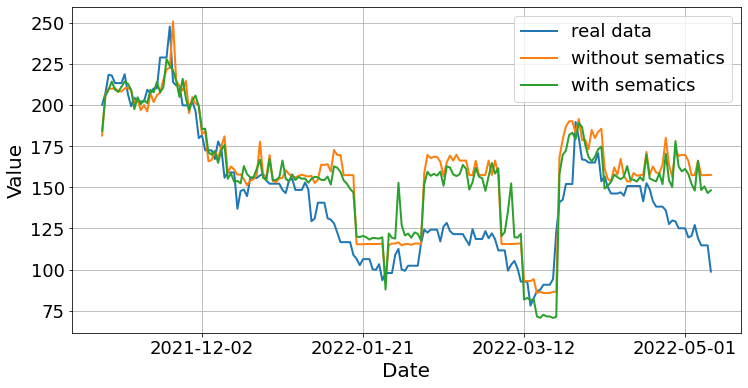

In [ ]:
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.xticks(size=18)
plt.yticks(size=18)
plt.plot(date[-len(xgb_test_pred):], y_test, linewidth = 2, label = 'real data')

plt.plot(date[-len(xgb_test_pred):], xgb_test_pred, linewidth = 2, label ='without sematics')
plt.plot(date[-len(xgb_test_pred):], xgb_test_pred_ad, linewidth = 2, label = 'with sematics')

#plt.plot(xgb_test_pred)
plt.ylabel('Value', size=20)
plt.xlabel('Date', size=20)
plt.grid(axis='both')
plt.legend(fontsize=18)
plt.savefig('D:\\Documents\\ITMO\\Year1\\Course_project_github\\Big_Data_course_project_2022\\plots\\xgb.csv',dpi=300, format='png')
plt.show()

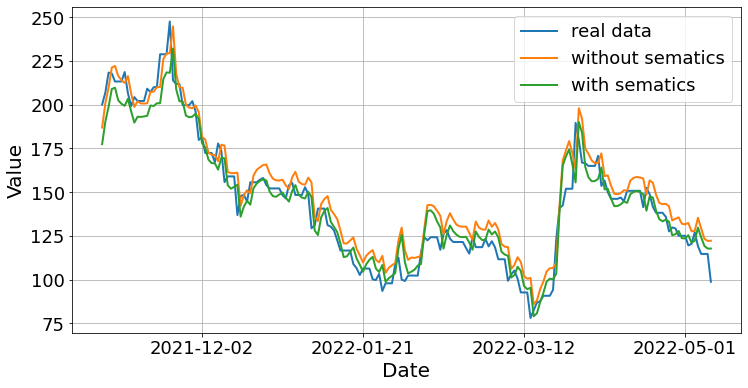

In [ ]:
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.xticks(size=18)
plt.yticks(size=18)
plt.plot(date[-len(lstm_test_pred):], y_test, linewidth = 2, label = 'real data')

plt.plot(date[-len(lstm_test_pred):], lstm_test_pred, linewidth = 2, label ='without sematics')
plt.plot(date[-len(lstm_test_pred):], lstm_test_pred_ad, linewidth = 2, label = 'with sematics')

#plt.plot(xgb_test_pred)
plt.ylabel('Value', size=20)
plt.xlabel('Date', size=20)
plt.grid(axis='both')
plt.legend(fontsize=18)
plt.savefig('D:\\Documents\\ITMO\\Year1\\Course_project_github\\Big_Data_course_project_2022\\plots\\lstm.csv',dpi=300, format='png')
plt.show()

## Binary predictions

In [ ]:
 'comments_lm_pos',
 'comments_lm_neg',
 'comments_lm_pol',
 'comments_lm_subj',
 'comments_hiv4_pos',
 'comments_hiv4_neg',
 'comments_hiv4_pol',
 'comments_hiv4_subj',
 'comments_vader_neg',
 'comments_vader_compound',
 'comments_vader_pos',
 'comments_vader_neu',

0.6243386268615723

In [7]:
xgb_train_pred_bin,xgb_test_pred_bin ,train_bin ,y_test_bin = XGB_tuning_ud(data['Adj Close'])
xgb_train_pred_ad_bin,xgb_test_pred_ad_bin ,train_bin ,y_test_bin = XGB_tuning_ud(data['Adj Close'], additional_data= data[['comments_vader_compound']] )

lstm_train_pred_bin,lstm_test_pred_bin ,train_bin ,y_test_bin, lstm_acc = LSTM_tuning_ud(data['Adj Close'], lag = 10, epch= 1000)
lstm_train_pred_ad_bin,lstm_test_pred_ad_bin ,train_bin ,y_test_bin, lstm_acc_ad = LSTM_tuning_ud(data['Adj Close'], additional_data= data[['comments_vader_compound']], lag = 10, epch= 1000)


print('XGB no sent profit = ',profit(xgb_test_pred_bin, y_test_bin, data['Adj Close']))
print('XGB with sent profit = ',profit(xgb_test_pred_ad_bin, y_test_bin, data['Adj Close']))

print('LSTM no sent profit = ',profit(lstm_test_pred_bin, y_test_bin, data['Adj Close']))
print('LSTM with sent profit = ',profit(lstm_test_pred_ad_bin, y_test_bin, data['Adj Close']))



No additional data
No additional data
Epoch 1/1000
15/15 [==============================] - 3s 50ms/step - loss: 0.6859 - accuracy: 0.6132
Epoch 2/1000
15/15 [==============================] - 1s 53ms/step - loss: 0.6613 - accuracy: 0.6440
Epoch 3/1000
15/15 [==============================] - 1s 52ms/step - loss: 0.6671 - accuracy: 0.6440
Epoch 4/1000
15/15 [==============================] - 1s 52ms/step - loss: 0.6624 - accuracy: 0.6440
Epoch 5/1000
15/15 [==============================] - 1s 55ms/step - loss: 0.6504 - accuracy: 0.6440
Epoch 6/1000
15/15 [==============================] - 1s 50ms/step - loss: 0.6523 - accuracy: 0.6440
Epoch 7/1000
15/15 [==============================] - 1s 53ms/step - loss: 0.6615 - accuracy: 0.6440
Epoch 8/1000
15/15 [==============================] - 1s 50ms/step - loss: 0.6546 - accuracy: 0.6440
Epoch 9/1000
15/15 [==============================] - 1s 51ms/step - loss: 0.6583 - accuracy: 0.6440
Epoch 10/1000
15/15 [==============================] 

In [9]:
print('LSTM no sent accuracy = ',lstm_acc)
print('LSTM with sent accuracy = ',lstm_acc_ad)


LSTM no sent accuracy =  0.5978835821151733
LSTM with sent accuracy =  0.5343915224075317


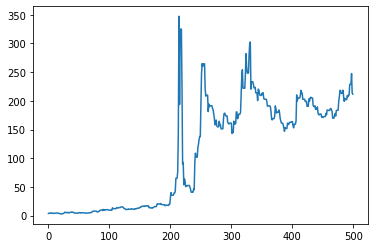

In [60]:
short_df = data[0:500]
plt.plot(short_df['Adj Close'])


In [67]:
xgb_train_pred_short,xgb_test_pred_short ,train_short ,y_test_short = XGB_tuning(short_df['Adj Close'], train_ratio = 0.7)
xgb_train_pred_ad_short,xgb_test_pred_ad_short ,train_short ,y_test_short = XGB_tuning(short_df['Adj Close'], additional_data= short_df[['comments_vader_compound']],train_ratio = 0.7)

lstm_train_pred_short,lstm_test_pred_short ,train_short ,y_test_short = LSTM_tuning(short_df['Adj Close'], lag = 10,train_ratio = 0.7)
lstm_train_pred_ad_short,lstm_test_pred_ad_short ,train_short ,y_test_short = LSTM_tuning(short_df['Adj Close'], additional_data= short_df[['comments_vader_compound']], lag = 10,train_ratio = 0.7)


print('XGB no sent RMSE = ',mean_squared_error(xgb_test_pred_short, y_test_short))
print('XGB with sent RMSE = ',mean_squared_error(xgb_test_pred_ad_short, y_test_short))

print('LSTM no sent RMSE = ',mean_squared_error(lstm_test_pred_short, y_test_short))
print('LSTM with sent RMSE = ',mean_squared_error(lstm_test_pred_ad_short, y_test_short))

No additional data
No additional data
XGB no sent RMSE =  113.1220712430104
XGB with sent RMSE =  118.33565908301051
LSTM no sent RMSE =  70.47550575676574
LSTM with sent RMSE =  75.72550540391038


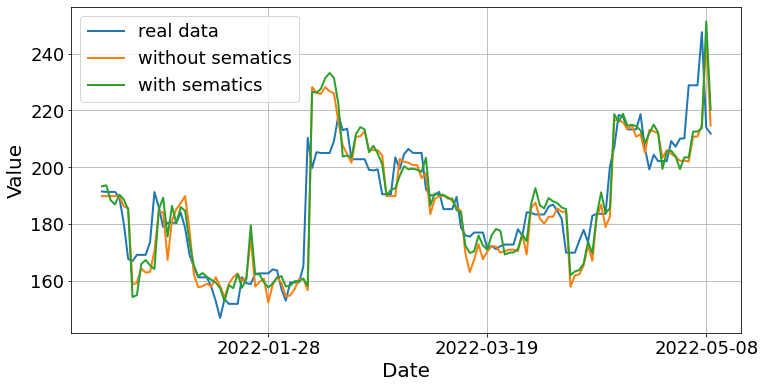

In [68]:
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
plt.xticks(size=18)
plt.yticks(size=18)
plt.plot(date[-len(xgb_test_pred_short):], y_test_short, linewidth = 2, label = 'real data')

plt.plot(date[-len(xgb_test_pred_short):], xgb_test_pred_short, linewidth = 2, label ='without sematics')
plt.plot(date[-len(xgb_test_pred_short):], xgb_test_pred_ad_short, linewidth = 2, label = 'with sematics')

#plt.plot(xgb_test_pred)
plt.ylabel('Value', size=20)
plt.xlabel('Date', size=20)
plt.grid(axis='both')
plt.legend(fontsize=18)
plt.savefig('D:\\Documents\\ITMO\\Year1\\Course_project_github\\Big_Data_course_project_2022\\plots\\xgb_short.csv',dpi=300, format='png')
plt.show()

In [69]:
xgb_train_pred_bin_short,xgb_test_pred_bin_short ,train_bin_short ,y_test_bin_short = XGB_tuning_ud(short_df['Adj Close'])
xgb_train_pred_ad_bin_short,xgb_test_pred_ad_bin_short ,train_bin_short ,y_test_bin_short = XGB_tuning_ud(short_df['Adj Close'], additional_data= data[['comments_vader_compound']] )

#lstm_train_pred_bin_short,lstm_test_pred_bin_short ,train_bin_short ,y_test_bin_short = LSTM_tuning_ud(data['Adj Close'], lag = 10)
#lstm_train_pred_ad_bin_short,lstm_test_pred_ad_bin_short ,train_bin_short ,y_test_bin_short = LSTM_tuning_ud(data['Adj Close'], additional_data= data[['comments_vader_compound']], lag = 10)


print('XGB no sent profit = ',profit(xgb_test_pred_bin, y_test_bin, short_df['Adj Close']))
print('XGB with sent profit = ',profit(xgb_test_pred_ad_bin, y_test_bin, short_df['Adj Close']))

#print('LSTM no sent profit = ',profit(lstm_test_pred_bin, y_test_bin, data['Adj Close']))
#print('LSTM with sent profit = ',profit(lstm_test_pred_ad_bin, y_test_bin, data['Adj Close']))


No additional data
XGB no sent profit =  1047.417893999999
XGB with sent profit =  1055.377884999999
